In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotter import write_chart

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

DATASET = 'diabetes.csv'

In [3]:
df = pd.read_csv('diabetes.csv')

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


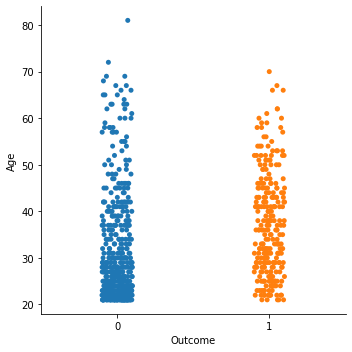

In [4]:
sns.catplot(x="Outcome", y="Age", data=df)

Accuracy Score: 0.7532467532467533


<AxesSubplot:>

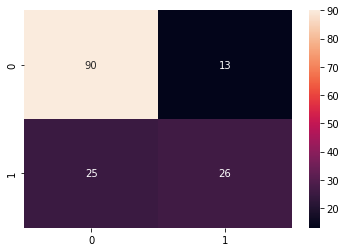

In [5]:

x = np.array(df.drop('Outcome', axis=1))
y = np.array(df['Outcome'])

x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(x, y, test_size = 0.2)

classifier = RandomForestClassifier(n_estimators=250, max_features=4, max_depth=8)
classifier.fit(x_train_set, y_train_set)                        

y_pred = classifier.predict(x_test_set)
print('Accuracy Score:', metrics.accuracy_score(y_test_set, y_pred))

sns.heatmap(metrics.confusion_matrix(y_test_set, y_pred), annot=True, fmt='g')
